In [1]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [2]:
(ds_train, ds_test), info = tfds.load(
    "imdb_reviews",
    split=["train", "test"],
    as_supervised=True,
    with_info=True
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.YAC91X_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.YAC91X_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.YAC91X_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [3]:
VOCAB_SIZE = 10000     # keep top 10k words
MAX_LEN = 200          # max words per review

encoder = keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_sequence_length=MAX_LEN
)

encoder.adapt(ds_train.map(lambda text, label: text))


In [4]:
def vectorize(text, label):
    return encoder(text), label

train_ds = ds_train.map(vectorize).batch(32).prefetch(tf.data.AUTOTUNE)
test_ds = ds_test.map(vectorize).batch(32).prefetch(tf.data.AUTOTUNE)


In [5]:
model = Sequential([
    Embedding(VOCAB_SIZE, 128),
    SimpleRNN(64),
    Dense(1, activation="sigmoid")
])


In [6]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [7]:
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=2
)


Epoch 1/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 99ms/step - accuracy: 0.5028 - loss: 0.6961 - val_accuracy: 0.5024 - val_loss: 0.6965
Epoch 2/2
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 98ms/step - accuracy: 0.5557 - loss: 0.6817 - val_accuracy: 0.5021 - val_loss: 0.7022


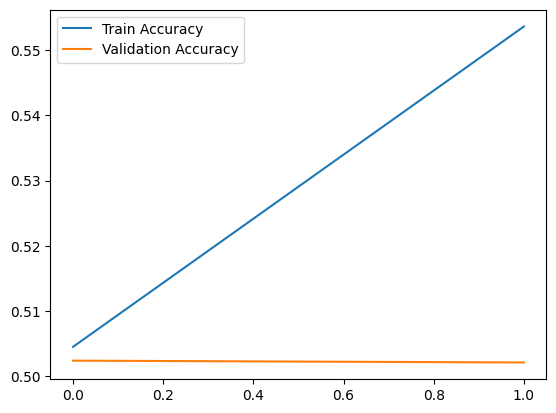

In [8]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()


In [9]:
sample_text = tf.constant(["this movie was not good at all"])
vectorized = encoder(sample_text)
prediction = model.predict(vectorized)

print("Prediction:", prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
Prediction: [[0.47330543]]
